# Markov Process and Numerical Solution of State Probabilities
Let us create a transition rate matrix $Q$ first.

In [1]:
import numpy as np

Q = np.zeros((4,4))
Q[0,1] = 2
Q[0,2] = 3
Q[1,2] = 1
Q[2,3] = 1/2
Q[3,2] = 2
Q[3,1] = 1
Q[3,0] = 1/2
Q[2,1] = 1
Q[1,0] = 1

qi = -Q.sum(axis = 1)
np.fill_diagonal(Q,qi) # set diagonal values
print(Q)

[[-5.   2.   3.   0. ]
 [ 1.  -2.   1.   0. ]
 [ 0.   1.  -1.5  0.5]
 [ 0.5  1.   2.  -3.5]]


## Kolmogorov forward equation for state probabilities
Now we compute the steady probabilities over time based on Kolmogorov forward equation. 
$$\frac{d}{dt}X(t) = X(t)Q$$ 

This can be solved with the matrix exponential $e^{tQ}$ and the initial state $X(0)$ at time $t=0$.

$$
X(t) = X(0)e^{tQ}
$$

_Note_ How to [install interactive widgets in jupyter lab](https://stackoverflow.com/questions/50149562/jupyterlab-interactive-plot)

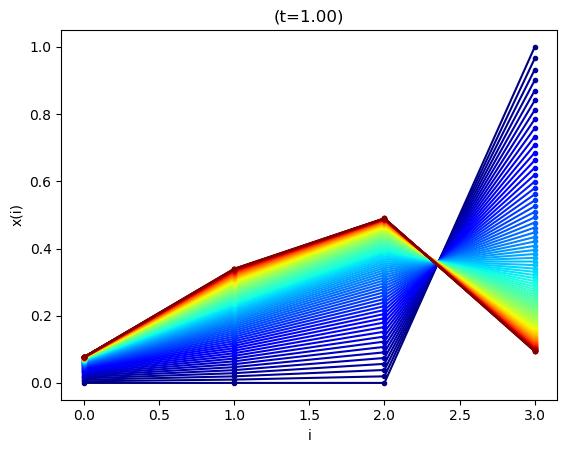

In [4]:
%matplotlib widget

from matplotlib import pyplot as plt
from IPython import display
import time

#%% define times to be evaluated
T = np.linspace(0,1,101)
X = np.zeros((4,len(T)))
#x0 = [1, 0, 0, 0] 
x0 = [0, 0, 0, 1] 

#%% matrix exponential
from scipy.linalg import expm

plt.figure(1)
plt.clf()
states = np.arange(X.shape[0])

ax = plt.gca()
ax.set_prop_cycle('color',[plt.cm.jet(i) for i in np.linspace(0, 1, len(T))])

for i,t in enumerate(T):
    if t == 0:
        X[:,i] = x0
    else:
        X[:,i] = np.matmul(x0, expm(Q*t))
    plt.plot(states,X[:,i],'.-')
    plt.title(f'(t={t:.2f})')
    plt.xlabel('i')
    plt.ylabel('x(i)')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)

## Comparison with Steady State Probabilities
We solve the equation $XQ=0$ and consider $X e = 1$. Therefore, we replace one equation by changing the matrix $Q$ and use the vector $b=(0,\dots,0,1)$. Then, we need to solve $XQ=b$ which means $X=bQ^{-1}$ with the matrix inverse $Q^{-1}$. The matrix $Q$ can be inverted if the determinant is not equal to zero, $det(Q) \neq 0$.

In [5]:
from scipy import linalg

#%% change the matrix and define vector b
Q2 = Q.copy()
b = np.zeros(len(Q))
b[-1] = 1
Q2[:, -1] = 1
print(Q2)

myx = np.matmul(b, linalg.inv(Q2)) # matrix inverse

plt.figure(2)
plt.clf()
plt.plot(states,X[:,-1],'o-', label='$X(t)$ for $t \to \infty$')
plt.plot(states,myx,'X-', label='$X Q = 0$')
plt.legend()
plt.xlabel('i')
plt.ylabel('x(i)')
plt.show()

[[-5.   2.   3.   1. ]
 [ 1.  -2.   1.   1. ]
 [ 0.   1.  -1.5  1. ]
 [ 0.5  1.   2.   1. ]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …